In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.0 MB 2.1 MB/s            
     |████████████████████████████████| 14.8 MB 84.7 MB/s            
     |████████████████████████████████| 759 kB 85.0 MB/s            
     |████████████████████████████████| 6.6 MB 102.0 MB/s            
     |████████████████████████████████| 67 kB 19.1 MB/s            
     |████████████████████████████████| 78 kB 9.7 MB/s              
     |████████████████████████████████| 677 kB 122.3 MB/s            
     |████████████████████████████████| 880 kB 127.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 97 kB 24.2 MB/s             
     |████████████████████████████████| 309 kB 109.4 MB/s            
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=25683b5f022df2c6b48cd452480cee2957451a8efd7c1aee380a7ea3f70c9055
  Stored in directory: /home

In [2]:
!pip install tape_proteins

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 68 kB 641 kB/s             
     |████████████████████████████████| 292 kB 2.8 MB/s            
     |████████████████████████████████| 101 kB 15.9 MB/s           
     |████████████████████████████████| 25.9 MB 117 kB/s             
     |████████████████████████████████| 2.3 MB 131.7 MB/s            
     |████████████████████████████████| 132 kB 119.0 MB/s            
     |████████████████████████████████| 8.8 MB 85.2 MB/s            
     |████████████████████████████████| 79 kB 27.8 MB/s             
     |████████████████████████████████| 291 kB 91.3 MB/s            
INFO: pip is looking at multiple versions of tqdm to determine which version is compatible with other requirements. This could take a while.
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
INFO: pip is looking at multiple versions of tensorboardx to determine which version is compatible with 

In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tensorflow
!pip install pytorch_lightning
!pip install SentencePiece

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458.3 MB 53 kB/s               ��█▏           | 289.0 MB 94.7 MB/s eta 0:00:02          | 294.2 MB 94.7 MB/s eta 0:00:02 B/s eta 0:00:02 ██████████████▌          | 307.2 MB 96.8 MB/s eta 0:00:02  MB/s eta 0:00:02 0:00:02 ████████▎        | 332.8 MB 96.8 MB/s eta 0:00:02 █████████████        | 342.8 MB 453 kB/s eta 0:04:15  :05:34  24  ██████████████████████▏      | 359.8 MB 318 kB/s eta 0:05:09  .7 MB 420 kB/s eta 0:03:50  ██████████████████████▋      | 366.0 MB 420 kB/s eta 0:03:40  ███████████████████████      | 371.1 MB 420 kB/s eta 0:03:28  �████████████████▏     | 374.1 MB 420 kB/s eta 0:03:21  ��███▍     | 378.5 MB 420 kB/s eta 0:03:10  ��███████▌     | 380.2 MB 420 kB/s eta 0:03:06  89.3 MB 97.7 MB/s eta 0:00:01 ��██▎    | 391.3 MB 97.7 MB/s eta 0:00:01 ████████▋    | 395.6 MB 97.7 MB/s eta 0:00:01 �██████████████    | 399.9 MB 97.7 MB/s eta 0:00:01  0:02:26  09.

In [8]:
device = torch.device('cuda')


In [10]:
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 1.8 MB/s            
     |████████████████████████████████| 247 kB 118.6 MB/s            
Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import torch
import pandas as pd
import numpy as np
from tape import ProteinBertModel, TAPETokenizer
from sklearn.model_selection import train_test_split

# Load your CSV file
file_path = 'data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming 'Sequence' is the column containing protein sequences, and 'Label' is the target column
X = df['Sequence']
y = df['Label']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the model and tokenizer
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')
w = 32  # Adjust the window size as needed

# Function to calculate embeddings
def calculate_embeddings(data):
    embeddings = []
    for i in range(data.shape[0]):
        # Tokenize the protein sequence
        token_id = torch.tensor([tokenizer.encode(data.iloc[i])])

        # Get word embeddings from the model
        output = model(token_id)[0]
        word_embeddings = output[0][1:2 * w + 2].detach().numpy()

        # Append the word embeddings to the list
        embeddings.append(word_embeddings)

    # Stack and reorganize the data
    embeddings = np.dstack(embeddings)
    embeddings = np.rollaxis(embeddings, -1)

    return embeddings

# Calculate word embeddings for training, validation, and testing sets
X_train_ds = calculate_embeddings(X_train)
X_valid_ds = calculate_embeddings(X_valid)
X_test_ds = calculate_embeddings(X_test)

# Display the resulting word embeddings for training data
print("Training Set Word Embeddings:")
print(X_train_ds)

# Display the resulting word embeddings for validation data
print("\nValidation Set Word Embeddings:")
print(X_valid_ds)

# Display the resulting word embeddings for testing data
print("\nTesting Set Word Embeddings:")
print(X_test_ds)


100%|██████████| 370264230/370264230 [00:33<00:00, 11064958.51B/s]
/home/btech/2020/kadam.devdas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


Training Set Word Embeddings:
[[[ 1.26622260e-01 -2.93047577e-01 -2.72925675e-01 ...  6.66439891e-01
   -5.18508911e-01 -1.86806953e+00]
  [-3.43770206e-01 -1.01169336e+00 -6.06660604e-01 ...  1.01748240e+00
    1.22264028e+00 -6.37807369e-01]
  [-6.43199384e-01 -1.43890822e+00 -8.59460711e-01 ...  1.69668305e+00
   -4.90404189e-01 -1.99681807e+00]
  ...
  [-9.84043598e-01 -1.15878499e+00 -1.28054261e+00 ...  9.21572521e-02
   -9.82389569e-01 -9.69299257e-01]
  [ 7.78363645e-01 -6.09244347e-01 -3.62627834e-01 ...  8.37312818e-01
   -1.04920781e+00 -1.24472106e+00]
  [-2.20548004e-01 -1.35677606e-01 -1.05105281e+00 ...  4.93327439e-01
   -1.20988762e+00 -4.01392609e-01]]

 [[-2.91224092e-01 -1.19146383e+00 -7.31058419e-04 ... -2.00106502e-02
    1.26565456e+00 -2.30606109e-01]
  [-2.02632874e-01 -1.27063203e+00  1.40510052e-01 ... -1.21875077e-01
    1.12656844e+00 -1.33528531e+00]
  [-6.86308563e-01 -6.50075078e-01  1.00212097e+00 ...  8.70832801e-01
    2.56262332e-01 -1.64168262e+00]

In [15]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    kmodel = keras.models.Sequential()
    kmodel.add(layers.Reshape(input_shape=embedding_input_shape, target_shape=embedding_input_shape))
    kmodel.add(layers.Conv1D(filters, kernel_size=kernels, padding='same', batch_input_shape=(None, *embedding_input_shape)))
    kmodel.add(layers.BatchNormalization(name="conv_1_bn"))
    kmodel.add(layers.ReLU(name="conv_1_relu"))

    kmodel.add(layers.Flatten())
    kmodel.add(layers.Dense(dense_layers1, activation='relu'))
    kmodel.add(layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.001)))
    kmodel.add(layers.Activation('relu'))
    kmodel.add(layers.Dropout(dropout))
    kmodel.add(layers.Dense(1, activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel



# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNModel function
model = CNNModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('BertCNN.h5')


Epoch 1/100
734/734 [==============================] - 24s 31ms/step - loss: 0.6581 - accuracy: 0.6390 - val_loss: 0.6012 - val_accuracy: 0.6605
Epoch 2/100
734/734 [==============================] - 14s 19ms/step - loss: 0.5915 - accuracy: 0.6863 - val_loss: 0.5613 - val_accuracy: 0.7053
Epoch 3/100
734/734 [==============================] - 13s 18ms/step - loss: 0.5630 - accuracy: 0.7089 - val_loss: 0.5324 - val_accuracy: 0.7261
Epoch 4/100
734/734 [==============================] - 13s 18ms/step - loss: 0.5339 - accuracy: 0.7266 - val_loss: 0.4976 - val_accuracy: 0.7530
Epoch 5/100
734/734 [==============================] - 13s 18ms/step - loss: 0.4947 - accuracy: 0.7490 - val_loss: 0.4492 - val_accuracy: 0.7762
Epoch 6/100
734/734 [==============================] - 13s 18ms/step - loss: 0.4501 - accuracy: 0.7741 - val_loss: 0.3938 - val_accuracy: 0.8109
Epoch 7/100
734/734 [==============================] - 13s 18ms/step - loss: 0.3946 - accuracy: 0.8066 - val_loss: 0.3382 - val_ac

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from keras.models import load_model

model = load_model('BertCNN.h5')

# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'MCC: {mcc}')


AUC: 0.705581558372061
Accuracy: 0.6469594594594594
F1 Score: 0.6566818050053147
Precision: 0.6382419233658904
Recall: 0.6762189054726369
MCC: 0.2944961764173158


In [18]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.5 MB 1.6 MB/s            
     |████████████████████████████████| 3.1 MB 93.9 MB/s            
     |████████████████████████████████| 1.1 MB 135.9 MB/s            


In [22]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.6 MB/s            


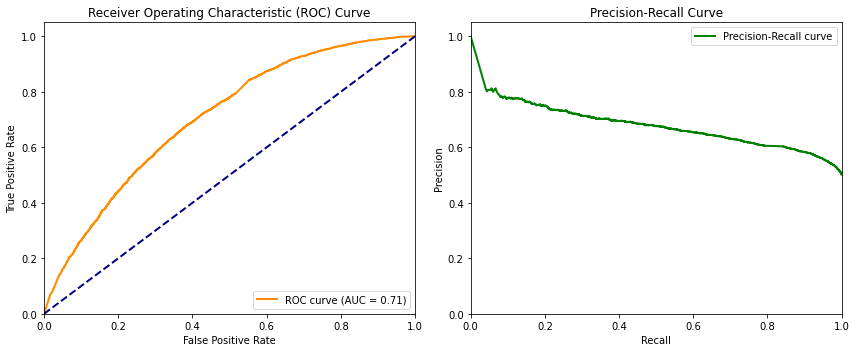

AUC: 0.705581558372061
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      5039
           1       0.64      0.68      0.66      5025

    accuracy                           0.65     10064
   macro avg       0.65      0.65      0.65     10064
weighted avg       0.65      0.65      0.65     10064



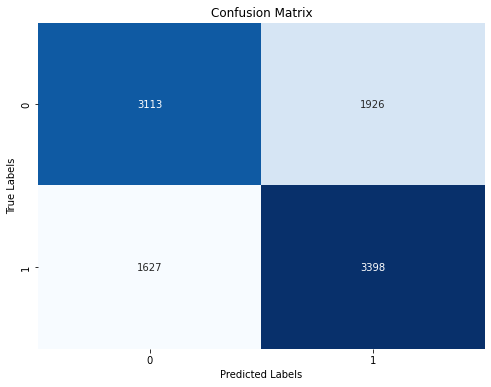

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')

# Display classification report including precision, recall, and F1 score
print(classification_report(y_test, y_pred_binary))

# Display confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [24]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNWithBiLSTMModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    # Add Bidirectional LSTM layer
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)

    # Add CNN layers
    x = layers.Conv1D(filters, kernel_size=kernels, padding='same')(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    x = layers.Flatten()(x)

    # Add Dense layers
    x = layers.Dense(dense_layers1, activation='relu')(x)
    x = layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                     activity_regularizer=keras.regularizers.l1(0.001))(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout)(x)

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid')(x)

    # Create and compile the model
    kmodel = keras.Model(inputs, outputs)
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)

    # Define early stopping callback
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)

    # Train the model
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel

# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNWithBiLSTMModel function
model = CNNWithBiLSTMModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('BertCNNWithBiLSTM.h5')


Epoch 1/100
734/734 [==============================] - 59s 73ms/step - loss: 0.6715 - accuracy: 0.6329 - val_loss: 0.6130 - val_accuracy: 0.6620
Epoch 2/100
734/734 [==============================] - 44s 60ms/step - loss: 0.5958 - accuracy: 0.6894 - val_loss: 0.5688 - val_accuracy: 0.7124
Epoch 3/100
734/734 [==============================] - 44s 59ms/step - loss: 0.5672 - accuracy: 0.7097 - val_loss: 0.5382 - val_accuracy: 0.7309
Epoch 4/100
734/734 [==============================] - 44s 60ms/step - loss: 0.5446 - accuracy: 0.7255 - val_loss: 0.5307 - val_accuracy: 0.7381
Epoch 5/100
734/734 [==============================] - 44s 60ms/step - loss: 0.5237 - accuracy: 0.7384 - val_loss: 0.4978 - val_accuracy: 0.7536
Epoch 6/100
734/734 [==============================] - 44s 60ms/step - loss: 0.4976 - accuracy: 0.7542 - val_loss: 0.4529 - val_accuracy: 0.7805
Epoch 7/100
734/734 [==============================] - 44s 60ms/step - loss: 0.4642 - accuracy: 0.7769 - val_loss: 0.4129 - val_ac

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from keras.models import load_model

model = load_model('BertCNNWithBiLSTM.h5')

# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'MCC: {mcc}')


AUC: 0.7183707775865661
Accuracy: 0.6656399046104928
F1 Score: 0.6773420270399846
Precision: 0.6535899333826795
Recall: 0.7028855721393035
MCC: 0.33229223205818076


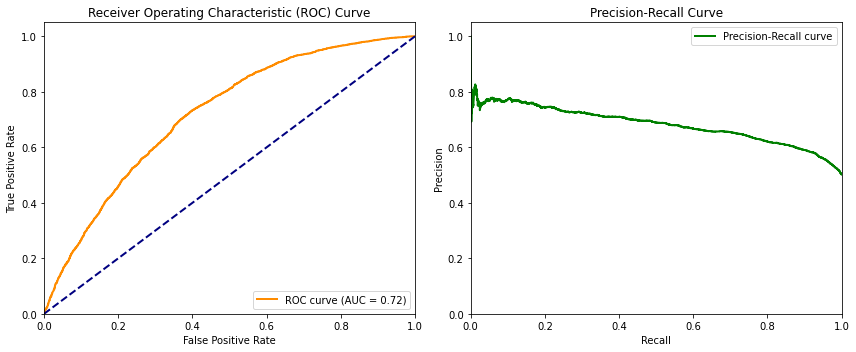

AUC: 0.7183707775865661
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      5039
           1       0.65      0.70      0.68      5025

    accuracy                           0.67     10064
   macro avg       0.67      0.67      0.67     10064
weighted avg       0.67      0.67      0.67     10064



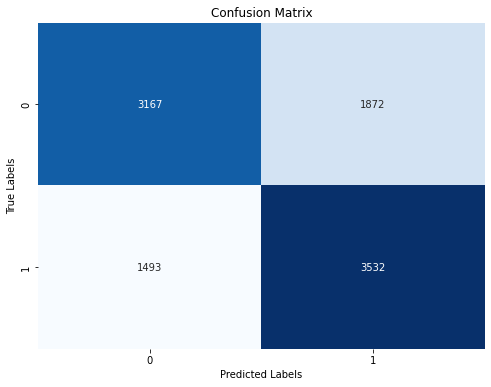

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')

# Display classification report including precision, recall, and F1 score
print(classification_report(y_test, y_pred_binary))

# Display confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
